# Deep Learning

### Weight Intialization Techniques
#### He Intialization$(np.random.rand(size_l,size_l-1)\times \sqrt{\frac{2}{size_{l}-1}}$
#### Xavier Intialization $(np.random.rand(size_l,size-)\times \sqrt{\frac{1}{size_{l}-1}}$
#### Xavierr Inti 
#### size-l is size of the lth layers

### Activation Function
### **********************
### Sigmoid function
### ------------------
#### $$\frac{1}{1+e^{-z}}$$,range 0-1,derivative range 0-0.25
### tanh(threshold activation) function
### ------------------------------------
#### $$\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}$$, range -1 to 1, derivative range 0-1
### ReLU function(used in hidden layer, solves vanishing gradient problem since its derivative is 1 or 0)
### --------------------------------
#### $$ReLU=max(0,x)$$, derivative is always 1 or 0
### Leaky Relu
### ------------
#### $$f(x)=max(0.01x,x)$$,inorder to handle dead activation(dying ReLu point)
### ELU
### -----
#### (using when vanishing gradient while implementing Leaky ReLu)
#### $$f(x)=\begin{cases}x, & \text{if x>0}\\ \alpha(e^{x}-1), & \text{otherwise} \end{cases}$$ 
### PReLU(Parametric ReLU)
### -----------------------------------
#### $$f(x)=\begin{cases}x, & \text{if x>0}\\ \alpha.x, & \text{otherwise}\end{cases}$$
#### where alpha is learning parameter
### Softmax
### -----------
#### $$S(x_j)=\frac{e^{x_j}}{\sum\limits_{k=1}^{K}e^{x_k}},j=1,2,...K$$

In [1]:
import numpy as np

In [2]:
input_value=np.array([[0,0],[0,1],[1,1],[1,0]])
input_value.shape

(4, 2)

In [3]:
input_value

array([[0, 0],
       [0, 1],
       [1, 1],
       [1, 0]])

In [25]:
output_value=np.array([0,1,1,0]).reshape(4,1)
output_value

array([[0],
       [1],
       [1],
       [0]])

In [26]:
output_value.shape

(4, 1)

In [27]:
weights=np.array([[0.1],[0.2]])
weights

array([[0.1],
       [0.2]])

In [28]:
bias=0.3

In [29]:
def sigmoid_func(x):
    return 1/(1+np.exp(-x))

In [30]:
def der(x):
    return sigmoid_func(x)*(1-sigmoid_func(x))

In [31]:
sigmoid_func(np.dot(input_arr,weights)+bias)

array([[0.57444252],
       [0.62245933],
       [0.64565631],
       [0.59868766]])

In [32]:
for epochs in range(10000):
    input_arr=input_value
    weighted_sum=np.dot(input_arr,weights)+bias
    first_output=sigmoid_func(weighted_sum)
    #error term
    error=first_output-output_value
    total_error=np.square(np.subtract(first_output,output_value)).mean()
    #optmization
    first_der=error
    second_der=der(first_output)
    derivative=first_der*second_der
    t_input=input_value.T
    final_derivative=np.dot(t_input,derivative)
    weights=weights-0.05*final_derivative
    for i in derivative:
        bias=bias-0.05 * i
print(weights)
print(bias)

[[-0.41953547]
 [ 8.98887811]]
[-4.19706344]


In [38]:
pred=np.array([0,0])
result=np.dot(pred,weights)+bias
res=sigmoid_func(result)
res

array([0.01481684])

# usin Keras library

In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<Axes: xlabel='Outcome', ylabel='count'>

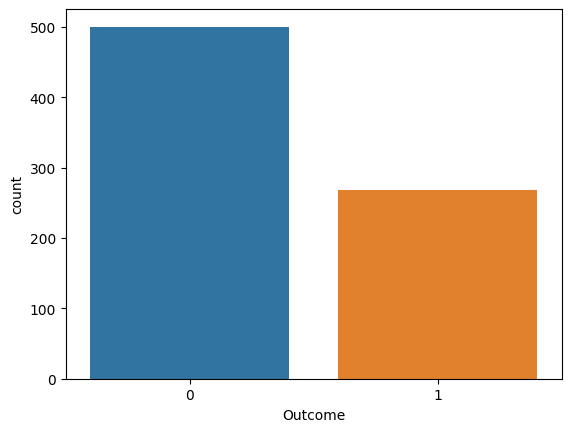

In [4]:
import seaborn as sns
sns.countplot(x=df['Outcome'])

In [5]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# Training neural model

### 

In [2]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
kerasmodel=Sequential()
kerasmodel.add(Dense(12,input_dim=8,activation='relu'))
kerasmodel.add(Dense(8,activation='relu'))
kerasmodel.add(Dense(1,activation='sigmoid'))

In [13]:
kerasmodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
kerasmodel.fit(X_train,y_train,epochs=150,batch_size=10)

Epoch 1/150
62/62 [==============================] - 1s 1ms/step - loss: 18.9167 - accuracy: 0.4691
Epoch 2/150
62/62 [==============================] - 0s 1ms/step - loss: 8.5388 - accuracy: 0.5879
Epoch 3/150
62/62 [==============================] - 0s 1ms/step - loss: 4.5954 - accuracy: 0.6254
Epoch 4/150
62/62 [==============================] - 0s 1ms/step - loss: 2.3424 - accuracy: 0.6075
Epoch 5/150
62/62 [==============================] - 0s 1ms/step - loss: 1.3772 - accuracy: 0.5700
Epoch 6/150
62/62 [==============================] - 0s 903us/step - loss: 1.1349 - accuracy: 0.6075
Epoch 7/150
62/62 [==============================] - 0s 932us/step - loss: 1.0233 - accuracy: 0.5831
Epoch 8/150
62/62 [==============================] - 0s 897us/step - loss: 0.9559 - accuracy: 0.6010
Epoch 9/150
62/62 [==============================] - 0s 801us/step - loss: 0.9208 - accuracy: 0.6059
Epoch 10/150
62/62 [==============================] - 0s 901us/step - loss: 0.8783 - accuracy: 0.609

In [17]:
#Train accuracy
_,accuracy = kerasmodel.evaluate(X_train,y_train)
print('Train Accuracy',accuracy*100)

20/20 [==============================] - 0s 892us/step - loss: 0.5023 - accuracy: 0.7687
Train Accuracy 76.87296271324158


In [23]:
kerasmodel.compile(loss='binary_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [25]:
kerasmodel.fit(X_train,y_train,epochs=150,batch_size=10)

Epoch 1/150
62/62 [==============================] - 0s 801us/step - loss: 0.6411 - accuracy: 0.6710
Epoch 2/150
62/62 [==============================] - 0s 785us/step - loss: 0.5696 - accuracy: 0.7101
Epoch 3/150
62/62 [==============================] - 0s 768us/step - loss: 0.5785 - accuracy: 0.7068
Epoch 4/150
62/62 [==============================] - 0s 768us/step - loss: 0.5754 - accuracy: 0.6954
Epoch 5/150
62/62 [==============================] - 0s 785us/step - loss: 0.5991 - accuracy: 0.6971
Epoch 6/150
62/62 [==============================] - 0s 801us/step - loss: 0.5756 - accuracy: 0.6954
Epoch 7/150
62/62 [==============================] - 0s 744us/step - loss: 0.5377 - accuracy: 0.7345
Epoch 8/150
62/62 [==============================] - 0s 801us/step - loss: 0.5822 - accuracy: 0.6873
Epoch 9/150
62/62 [==============================] - 0s 1ms/step - loss: 0.5681 - accuracy: 0.7003
Epoch 10/150
62/62 [==============================] - 0s 899us/step - loss: 0.5703 - accuracy

In [27]:
_,accuracy=kerasmodel.evaluate(X_train,y_train)
print(accuracy)

20/20 [==============================] - 0s 810us/step - loss: 0.4887 - accuracy: 0.7752
0.7752442955970764


In [30]:
import tensorflow as tf

### Titanic Data

In [3]:
df=pd.read_csv('titanics.csv')
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,1,0
1,1,1,38.0,1,0,71.2833,0,1
2,3,1,26.0,0,0,7.9250,1,1
3,1,1,35.0,1,0,53.1000,1,1
4,3,0,35.0,0,0,8.0500,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Sex       1309 non-null   int64  
 2   Age       1223 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   Parch     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1309 non-null   int64  
 7   Survived  1309 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 81.9 KB


In [5]:
df.dropna(subset='Age',inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1223 entries, 0 to 1306
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1223 non-null   int64  
 1   Sex       1223 non-null   int64  
 2   Age       1223 non-null   float64
 3   SibSp     1223 non-null   int64  
 4   Parch     1223 non-null   int64  
 5   Fare      1222 non-null   float64
 6   Embarked  1223 non-null   int64  
 7   Survived  1223 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 86.0 KB


In [7]:
df['Fare']=df['Fare'].fillna(df['Fare'].mode()[0])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1223 entries, 0 to 1306
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1223 non-null   int64  
 1   Sex       1223 non-null   int64  
 2   Age       1223 non-null   float64
 3   SibSp     1223 non-null   int64  
 4   Parch     1223 non-null   int64  
 5   Fare      1223 non-null   float64
 6   Embarked  1223 non-null   int64  
 7   Survived  1223 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 86.0 KB


In [9]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [12]:
keras=Sequential()
keras.add(Dense(64,input_dim=7,activation='relu'))
keras.add(Dense(32,activation='relu'))
keras.add(Dense(1,activation='sigmoid'))

In [13]:
keras.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
keras.fit(X_train,y_train,epochs=150,batch_size=10)

Epoch 1/150
92/92 [==============================] - 1s 2ms/step - loss: 0.7393 - accuracy: 0.6347
Epoch 2/150
92/92 [==============================] - 0s 2ms/step - loss: 0.6075 - accuracy: 0.6947
Epoch 3/150
92/92 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.7143
Epoch 4/150
92/92 [==============================] - 0s 1ms/step - loss: 0.5384 - accuracy: 0.7514
Epoch 5/150
92/92 [==============================] - 0s 1ms/step - loss: 0.5447 - accuracy: 0.7503
Epoch 6/150
92/92 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.7688
Epoch 7/150
92/92 [==============================] - 0s 2ms/step - loss: 0.4631 - accuracy: 0.8092
Epoch 8/150
92/92 [==============================] - 0s 1ms/step - loss: 0.5081 - accuracy: 0.7786
Epoch 9/150
92/92 [==============================] - 0s 1ms/step - loss: 0.4267 - accuracy: 0.8332
Epoch 10/150
92/92 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8342
Epoch 11/

92/92 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8604
Epoch 84/150
92/92 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8571
Epoch 85/150
92/92 [==============================] - 0s 1ms/step - loss: 0.3474 - accuracy: 0.8626
Epoch 86/150
92/92 [==============================] - 0s 1ms/step - loss: 0.3457 - accuracy: 0.8702
Epoch 87/150
92/92 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.8604
Epoch 88/150
92/92 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.8615
Epoch 89/150
92/92 [==============================] - 0s 1ms/step - loss: 0.3482 - accuracy: 0.8626
Epoch 90/150
92/92 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8604
Epoch 91/150
92/92 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8713
Epoch 92/150
92/92 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8691
Epoch 93/150


In [15]:
_,accuracy = keras.evaluate(X_train,y_train)
print(accuracy)

29/29 [==============================] - 0s 1ms/step - loss: 0.3110 - accuracy: 0.8800
0.880043625831604


## Mobile Data

In [16]:
df=pd.read_csv('mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  3000 non-null   int64  
 1   blue           3000 non-null   int64  
 2   clock_speed    3000 non-null   float64
 3   dual_sim       3000 non-null   int64  
 4   fc             3000 non-null   int64  
 5   four_g         3000 non-null   int64  
 6   int_memory     3000 non-null   int64  
 7   m_dep          3000 non-null   float64
 8   mobile_wt      3000 non-null   int64  
 9   n_cores        3000 non-null   int64  
 10  pc             3000 non-null   int64  
 11  px_height      3000 non-null   int64  
 12  px_width       3000 non-null   int64  
 13  ram            3000 non-null   int64  
 14  sc_h           3000 non-null   int64  
 15  sc_w           3000 non-null   int64  
 16  talk_time      3000 non-null   int64  
 17  three_g        3000 non-null   int64  
 18  touch_sc

In [18]:
df.dropna(subset='price_range',inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_screen 

In [21]:
X=df.drop('price_range',axis=1)
y=df['price_range']

In [23]:
y.unique()

array([1., 2., 3., 0.])

In [22]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25)

In [36]:
from keras.models import Sequential
from keras.layers import Dense
keras=Sequential()
keras.add(Dense(64,input_dim=20,activation='relu'))
keras.add(Dense(32,activation='LeakyReLU'))
keras.add(Dense(4,activation='relu'))
keras.add(Dense(1,activation='softmax'))

In [40]:
keras.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [41]:
keras.fit(X_train,y_train,epochs=150,batch_size=15)

Epoch 1/150
100/100 [==============================] - 1s 1ms/step - loss: -794394820608.0000 - accuracy: 0.2513
Epoch 2/150
100/100 [==============================] - 0s 1ms/step - loss: -808987787264.0000 - accuracy: 0.2513
Epoch 3/150
100/100 [==============================] - 0s 1ms/step - loss: -824080269312.0000 - accuracy: 0.2513
Epoch 4/150
100/100 [==============================] - 0s 1ms/step - loss: -839631306752.0000 - accuracy: 0.2513
Epoch 5/150
100/100 [==============================] - 0s 1ms/step - loss: -855441014784.0000 - accuracy: 0.2513
Epoch 6/150
100/100 [==============================] - 0s 1ms/step - loss: -871660453888.0000 - accuracy: 0.2513
Epoch 7/150
100/100 [==============================] - 0s 1ms/step - loss: -888202461184.0000 - accuracy: 0.2513
Epoch 8/150
100/100 [==============================] - 0s 1ms/step - loss: -905091612672.0000 - accuracy: 0.2513
Epoch 9/150
100/100 [==============================] - 0s 1ms/step - loss: -922344554496.0000 - 

Epoch 143/150
100/100 [==============================] - 0s 1ms/step - loss: -7000843878400.0000 - accuracy: 0.2513
Epoch 144/150
100/100 [==============================] - 0s 1ms/step - loss: -7083099947008.0000 - accuracy: 0.2513
Epoch 145/150
100/100 [==============================] - 0s 1ms/step - loss: -7165681074176.0000 - accuracy: 0.2513
Epoch 146/150
100/100 [==============================] - 0s 1ms/step - loss: -7249214832640.0000 - accuracy: 0.2513
Epoch 147/150
100/100 [==============================] - 0s 1ms/step - loss: -7333068406784.0000 - accuracy: 0.2513
Epoch 148/150
100/100 [==============================] - 0s 1ms/step - loss: -7417367101440.0000 - accuracy: 0.2513
Epoch 149/150
100/100 [==============================] - 0s 1ms/step - loss: -7502791966720.0000 - accuracy: 0.2513
Epoch 150/150
100/100 [==============================] - 0s 1ms/step - loss: -7588296523776.0000 - accuracy: 0.2513


In [42]:
_,accuracy=keras.evaluate(X_train,y_train)
print(accuracy)

47/47 [==============================] - 0s 1ms/step - loss: -7632715251712.0000 - accuracy: 0.2513
0.2513333261013031


In [2]:
np.random.rand(1,2,5)

array([[[0.68334261, 0.19982015, 0.35718513, 0.87953982, 0.2061754 ],
        [0.17927507, 0.91540991, 0.64349541, 0.49610859, 0.16033204]]])